# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

In [2]:
data_set = pd.read_csv("Data.csv")
data_set.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


# Taking care of missing data

### independent and dependent variables

In [3]:
x = data_set.iloc[:, :-1] # independent variables
y = data_set.iloc[:, -1] # dependent variables

### Missing data

In [4]:
from sklearn.preprocessing import Imputer

# create imputer objcet for a particular columns for the missing data
imp_obj = Imputer(missing_values = np.NaN, strategy = "mean", axis = 0).fit(x.iloc[:, 1:])

# tarnsform the missing data to the new non-missing data
x.iloc[:, 1:] = imp_obj.transform(x.iloc[:, 1:])

x.head()

,Country,Age,Salary
0,France,44.0,72000.000000
1,Spain,27.0,48000.000000
2,Germany,30.0,54000.000000
3,Spain,38.0,61000.000000
4,Germany,40.0,63777.777778


# Encoding categorical data

### Encoding the Independent Variables

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
lbe_x = LabelEncoder()
x.iloc[:, 0] = lbe_x.fit_transform(x.iloc[:, 0])

# cearte dumey variable with encoder object
ohe_x = OneHotEncoder(categorical_features = [0])
x = ohe_x.fit_transform(x).toarray()

x

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

### Encoding the dependent Variables

In [7]:
lbe_y = LabelEncoder()
y = lbe_y.fit_transform(y)

y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

# Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

C:\Users\amgd\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
train_x = sc_x.fit_transform(train_x)
test_x = sc_x.transform(test_x)

### Initial plotting the independent variables

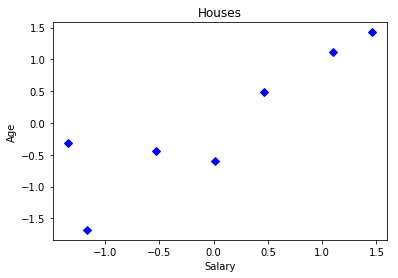

In [10]:
plt.xlabel("Salary")
plt.ylabel("Age")
plt.title("Houses")

plt.plot(train_x[:, 4], train_x[:, 3], color = 'b', marker = "D", markersize = "5", linestyle = "")